In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data =pd.read_csv('jamboree_dataset.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [58]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [59]:
X= data.drop(['Serial No.', 'Research'], axis=1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,0.87
496,337,117,5,5.0,5.0,9.87,0.96
497,330,120,5,4.5,5.0,9.56,0.93
498,312,103,4,4.0,5.0,8.43,0.73


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x=data.drop('Chance of Admit ', axis=1)
y=data['Chance of Admit '] # label

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train, y_train) 

y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean squared error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"R2 score : {r2*100:.2f} %")

Mean squared error : 0.003500684226487507
Mean absolute error : 0.04352655863808974
R2 score : 83.20 %


# Hyperparameter tuning
* Ridge alpha = 1, 10, 100 ... 
* Lasso alpha = 1, 0.1, 0.001 ...

In [38]:
from sklearn.linear_model import Ridge

model=Ridge(alpha=10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean squared error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"R2 score : {r2*100:.2f} %")

Mean squared error : 0.0036486920876671308
Mean absolute error : 0.04497305256938946
R2 score : 82.49 %


In [52]:
from sklearn.linear_model import Lasso

model=Lasso(alpha=0.01)
model.fit(x_train, y_train) 

y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean squared error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"R2 score : {r2*100:.2f} %")

Mean squared error : 0.005008575524098535
Mean absolute error : 0.052557327356417646
R2 score : 75.97 %


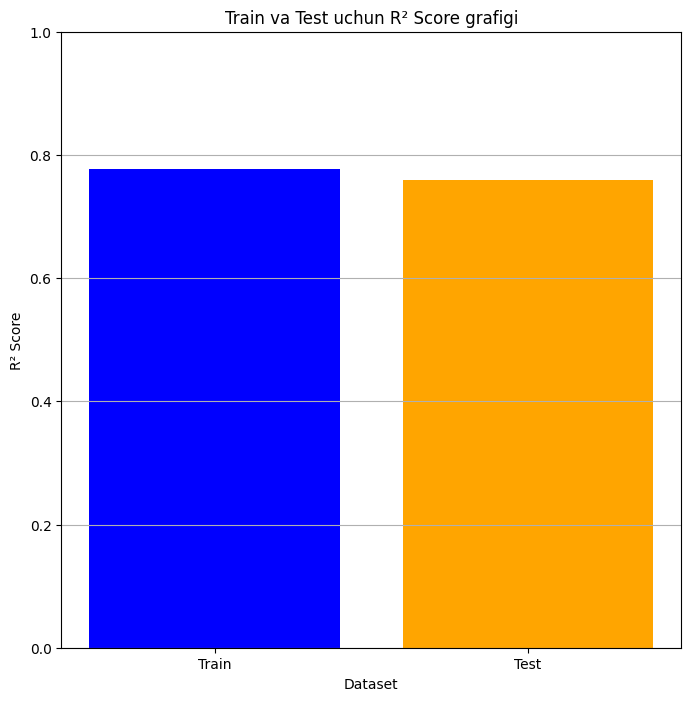

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Train va test uchun R2 hisoblash
r2_train = r2_score(y_train, model.predict(x_train))
r2_test = r2_score(y_test, model.predict(x_test))

# Grafik chizish
plt.figure(figsize=(8, 8))
plt.bar(["Train", "Test"], [r2_train, r2_test], color=['blue', 'orange'])

plt.xlabel("Dataset")
plt.ylabel("R² Score")
plt.title("Train va Test uchun R² Score grafigi")
plt.ylim(0, 1)  # R² odatda 0-1 oralig'ida bo'ladi
plt.grid(axis='y')
plt.show()

In [62]:
X=data.drop('Chance of Admit ', axis=1)
y=data['Chance of Admit '] # label

In [63]:
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.3, random_state=24)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_Train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(x_test)

model=LinearRegression()
model.fit(X_Train_scaler, y_train)

y_pred=model.predict(X_test_scaler)

mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(mse)
print(mae)
print(r2*100)

ValueError: Found input variables with inconsistent numbers of samples: [350, 100]

In [69]:
X_test_scaler.shape
y_pred.shape

(100,)